[[1.25000000e+02 1.92000000e+02 1.06271155e-01 0.00000000e+00]
 [2.18000000e+02 2.29000000e+02 9.41189826e-01 1.00000000e+00]
 [0.00000000e+00 3.45000000e+02 2.16280609e-01 2.00000000e+00]
 [1.11000000e+02 2.07000000e+02 1.77559078e-01 3.00000000e+00]
 [1.88000000e+02 3.15000000e+02 8.95950496e-01 4.00000000e+00]
 [0.00000000e+00 3.82000000e+02 2.77077407e-01 5.00000000e+00]
 [1.02000000e+02 2.05000000e+02 2.26210907e-01 6.00000000e+00]
 [1.20000000e+02 2.94000000e+02 8.12968671e-01 7.00000000e+00]
 [4.40000000e+01 2.10000000e+02 8.94514024e-01 8.00000000e+00]
 [5.40000000e+01 9.90000000e+01 8.43158722e-01 9.00000000e+00]
 [1.28000000e+02 2.09000000e+02 1.18675612e-01 1.00000000e+01]
 [2.54000000e+02 3.32000000e+02 8.97528410e-01 1.10000000e+01]
 [0.00000000e+00 3.83000000e+02 5.28142333e-01 1.20000000e+01]
 [2.70000000e+01 4.33000000e+02 3.42792332e-01 1.30000000e+01]
 [2.54000000e+02 4.57000000e+02 6.37560487e-01 1.40000000e+01]
 [0.00000000e+00 4.57000000e+02 1.05743505e-01 1.500000

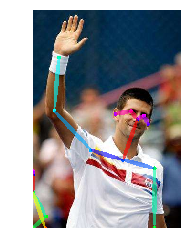

In [10]:
import sys
sys.path.insert(0, 'python')
import cv2
import model
import util
from hand import Hand
from body import Body
import matplotlib.pyplot as plt
import copy
import numpy as np

body_estimation = Body('model/body_pose_model.pth')
hand_estimation = Hand('model/hand_pose_model.pth')

test_image = 'images/demo.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
candidate, subset = body_estimation(oriImg)
canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, subset)
# detect hand
# hands_list = util.handDetect(candidate, subset, oriImg)

# all_hand_peaks = []
# for x, y, w, is_left in hands_list:
#     # cv2.rectangle(canvas, (x, y), (x+w, y+w), (0, 255, 0), 2, lineType=cv2.LINE_AA)
#     # cv2.putText(canvas, 'left' if is_left else 'right', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

#     # if is_left:
#         # plt.imshow(oriImg[y:y+w, x:x+w, :][:, :, [2, 1, 0]])
#         # plt.show()
#     peaks = hand_estimation(oriImg[y:y+w, x:x+w, :])
#     peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], peaks[:, 0]+x)
#     peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
#     # else:
#     #     peaks = hand_estimation(cv2.flip(oriImg[y:y+w, x:x+w, :], 1))
#     #     peaks[:, 0] = np.where(peaks[:, 0]==0, peaks[:, 0], w-peaks[:, 0]-1+x)
#     #     peaks[:, 1] = np.where(peaks[:, 1]==0, peaks[:, 1], peaks[:, 1]+y)
#     #     print(peaks)
#     all_hand_peaks.append(peaks)

# canvas = util.draw_handpose(canvas, all_hand_peaks)

plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()


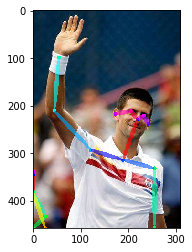

In [15]:
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.show()

In [12]:
subset

array([[ 1.        ,  4.        ,  7.        ,  8.        ,  9.        ,
        11.        , 14.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , 18.        ,
        20.        , 22.        , 23.        , 18.85314369, 11.        ],
       [ 2.        ,  5.        , -1.        , -1.        , -1.        ,
        12.        , 13.        , 15.        , -1.        , -1.        ,
        -1.        , 16.        , -1.        , -1.        , -1.        ,
        21.        , -1.        , 24.        ,  4.30049683,  8.        ]])

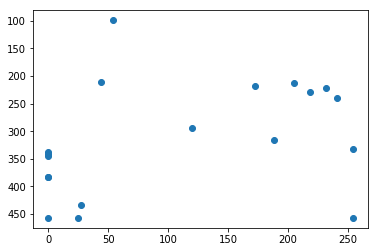

In [35]:
# x and y coordinates of each subset. 
# subset: n*20 array, 0-17 is the index in candidate, 18 is the total score, 19 is the total parts.
# candidate: x, y, score, id.
# Each array in subset indicates a different person.
# this code snippet tells you how to accumulate the xs and ys from the candidate and subset arrays.
xs = []
ys = []
for sub in subset:
    for n in sub[:-2]:
        index = int(n)
        if index == -1:
            continue
        x, y = candidate[index][0:2]
        
        xs.append(int(x))
        ys.append(int(y))
    
plt.scatter(xs,ys)
plt.gca().invert_yaxis()
